In [18]:
from nltk import accuracy


def true_positive(y_true, y_pred):
     # 初始化真阳性样本计数器
    tp = 0
     # 遍历y_true，y_pred中所有元素
    for yt, yp in zip(y_true, y_pred): 
    #若真实标签为正类且预测标签也为正类，计数器增加
        if yt==1 and yp==1:
            tp += 1 
    # 返回真阳性样本数
    return tp

def true_negative(y_true, y_pred): 
    # 初始化真阴性样本计数器
    tn = 0
     # 遍历y_true，y_pred中所有元素
    for yt, yp in zip(y_true, y_pred): 
    # 若真实标签为负类且预测标签也为负类，计数器增加
        if yt ==0 and yp ==0:
            tn += 1 
        # 返回真阴性样本数
    return tn
def false_positive(y_true, y_pred): 
    # 初始化假阳性计数器
    fp = 0
     # 遍历y_true，y_pred中所有元素
    for yt, yp in zip(y_true, y_pred): 
    # 若真实标签为负类而预测标签为正类，计数器增加
        if yt ==0 and yp ==1:
            fp += 1 
    # 返回假阳性样本数
    return fp

def false_negative(y_true, y_pred): 
    # 初始化假阴性计数器
    fn = 0
     # 遍历y_true，y_pred中所有元素
    for yt, yp in zip(y_true, y_pred): 
    # 若真实标签为正类而预测标签为负类，计数器增加
        if yt ==1 and yp ==0:
            fn += 1 
    # 返回假阴性样本数
    return fn

def accuracy_v2(y_true, y_pred):
    # 真阳性样本数
    tp = true_positive(y_true, y_pred)
     # 假阳性样本数
    fp = false_positive(y_true, y_pred)
     # 假阴性样本数
    fn = false_negative(y_true, y_pred)
     # 真阴性样本数
    tn = true_negative(y_true, y_pred)
     # 准确率
    accuracy_score = (tp + tn) / (tp + tn + fp + fn) 
    return accuracy_score

def precision(y_true, y_pred):
     # 真阳性样本数
    tp = true_positive(y_true, y_pred) 
    # 假阳性样本数
    fp = false_positive(y_true, y_pred)
     # 精确率
    precision = tp / (tp + fp)
    return precision

def recall(y_true, y_pred):
    # 真阳性样本数
    tp = true_positive(y_true, y_pred) 
    # 假阴性样本数
    fn = false_negative(y_true, y_pred) 
    # 召回率
    recall = tp / (tp + fn)
    return recall
def f1(y_true, y_pred):
    # 计算精确率
    p = precision(y_true, y_pred) 
    # 计算召回率
    r = recall(y_true, y_pred)
     # 计算f1值
    score = 2 * p * r / (p + r) 
    return score

def tpr(y_true, y_pred):
 # 真阳性率（TPR），与召回率计算公式一致
    return recall(y_true, y_pred)
def fpr(y_true, y_pred):
    # 假阳性样本数
    fp = false_positive(y_true, y_pred) 
    # 真阴性样本数
    tn = true_negative(y_true, y_pred) 
    # 返回假阳性率（FPR）
    return fp / (tn + fp)

In [14]:
from sklearn import metrics

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0] 
print(true_positive(l1, l2))
print(false_positive(l1, l2)) 
print(false_negative(l1, l2)) 
print(true_negative(l1, l2)) 
print(accuracy_v2(l1, l2))
print(metrics.accuracy_score(l1, l2))
print(precision(l1, l2))
print(recall(l1, l2))




2
1
2
3
0.625
0.625
0.6666666666666666
0.5


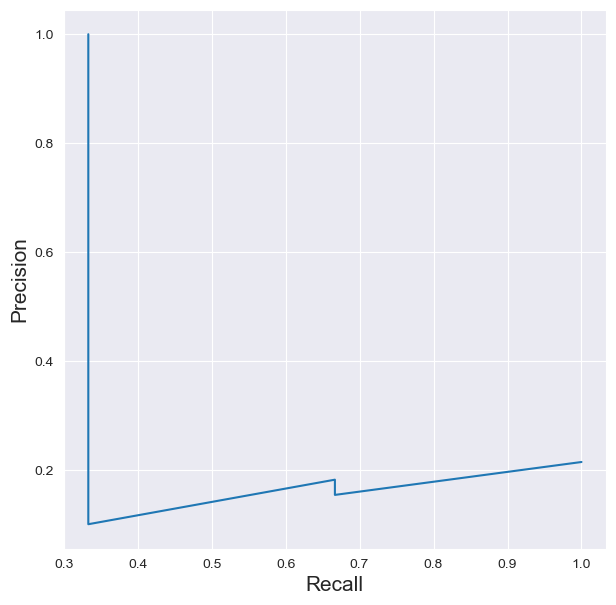

In [15]:
from matplotlib import pyplot as plt

y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708,         
          0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377,  0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

precisions = [] 
recalls = []
thresholds = [0.0490937 , 0.05934905, 0.079377,
 0.08584789, 0.11114267, 0.11639273, 
0.15952202, 0.17554844, 0.18521942, 
0.27259048, 0.31620708, 0.33056815, 
0.39095342, 0.61977213]
for i in thresholds:
    # 计算精确率
    temp_prediction = [1 if x >= i else 0 for x in y_pred]  
    # 计算精确率
    p = precision(y_true, temp_prediction) 
    # 计算召回率
    r = recall(y_true, temp_prediction) 
    # 加入精确率列表
    precisions.append(p)
     # 加入召回率列表
    recalls.append(r)
    
plt.figure(figsize=(7, 7))
 # x轴为召回率，y轴为精确率
plt.plot(recalls, precisions)
 # 添加x轴标签，字体大小为15
plt.xlabel('Recall', fontsize=15)
 # 添加y轴标签，字条大小为15
plt.ylabel('Precision', fontsize=15)
plt.show()


In [17]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,      
         1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
f1(y_true, y_pred) 


0.5714285714285715

In [23]:
import pandas as pd  # 初始化真阳性率列表
tpr_list = [] 
# 初始化假阳性率列表
fpr_list = []
 
# 真实样本标签
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]
 
# 预测样本为正类（1）的概率
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]
 
# 预测阈值
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
 
# 遍历预测阈值
for thresh in thresholds:
    # 若样本为正类（1）的概率大于阈值，为1，否则为0
    temp_pred = [1 if x >= thresh else 0 for x in y_pred] 
    # 真阳性率
    temp_tpr = tpr(y_true, temp_pred)
    # 假阳性率
    temp_fpr = fpr(y_true, temp_pred)
    # 将真阳性率加入列表
    tpr_list.append(temp_tpr) 
    # 将假阳性率加入列表
    fpr_list.append(temp_fpr)
pd.DataFrame({'thresholds': thresholds,
                   'tpr': tpr_list,
                   'fpr': fpr_list})

,thresholds,tpr,fpr
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


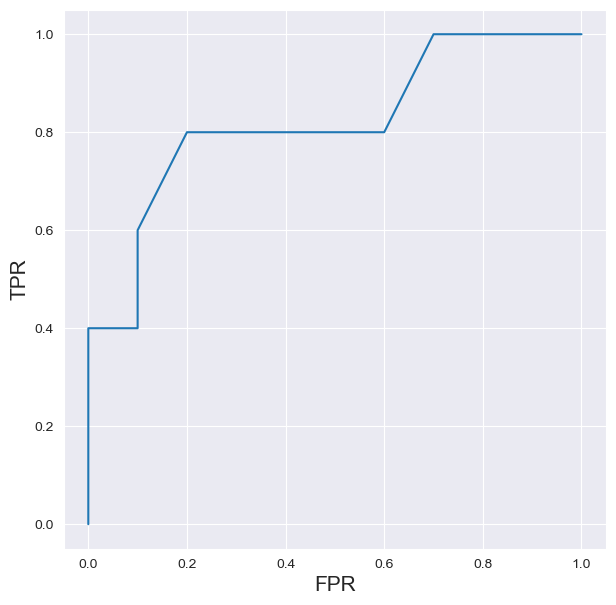

In [25]:
plt.figure(figsize=(7, 7))
 # x轴为召回率，y轴为精确率
plt.plot(fpr_list, tpr_list)
 # 添加x轴标签，字体大小为15
plt.xlabel('FPR', fontsize=15)
 # 添加y轴标签，字条大小为15
plt.ylabel('TPR', fontsize=15)
plt.show()

In [26]:
from sklearn import metrics
y_true = [0, 0, 0, 0, 1, 0, 1,         
        0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,        
        0.9, 0.5, 0.3, 0.66, 0.3, 0.2,     
        0.85, 0.15, 0.99]
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001